In [9]:
 ! pip install -q kaggle

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bricekramer","key":"95f13bd353d4da092beb8da6071c7088"}'}

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [6]:
import os

os.environ['KAGGLE_USERNAME'] = "bricekramer"

os.environ['KAGGLE_KEY'] = "95f13bd353d4da092beb8da6071c7088"

In [7]:
!kaggle datasets download -d gpiosenka/sports-classification

100% 475M/477M [00:14<00:00, 28.8MB/s]
100% 477M/477M [00:14<00:00, 34.3MB/s]


In [8]:
import zipfile
with zipfile.ZipFile('sports-classification.zip',"r") as zip_ref:
     zip_ref.extractall("sports")

In [9]:
train_path = 'sports/train/'
test_path = 'sports/test/'

In [10]:
train_gen = ImageDataGenerator(rescale = 1/255)
test_gen = ImageDataGenerator(rescale = 1/255)

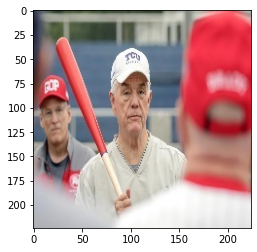

In [11]:
plt.imshow(plt.imread(train_path + 'baseball/001.jpg'));

In [12]:
train_data = train_gen.flow_from_directory(
    train_path,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    test_path,
    class_mode='categorical'
)

Found 13572 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [13]:
effnet = EfficientNetB0(include_top=False, weights='imagenet')

16719872/16705208 [==============================] - 0s 0us/step


In [14]:
model = Sequential()
model.add(effnet)
model.add(GlobalAveragePooling2D())
model.add(Dense(1))
model.add(Dropout(0.2))
model.add(Dense(100, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 100)               200       
                                                                 
Total params: 4,051,052
Trainable params: 4,009,029
Non-trainable params: 42,023
_________________________________________

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(train_data,
                    batch_size=10,
                    validation_data = test_data,
                    validation_batch_size=10,
                    epochs = 10)

Epoch 1/10
425/425 [==============================] - 191s 402ms/step - loss: 4.4350 - accuracy: 0.0198 - val_loss: 5.1856 - val_accuracy: 0.0100
Epoch 2/10
425/425 [==============================] - 168s 395ms/step - loss: 4.2460 - accuracy: 0.0256 - val_loss: 4.7653 - val_accuracy: 0.0120
Epoch 3/10
425/425 [==============================] - 170s 399ms/step - loss: 4.1503 - accuracy: 0.0294 - val_loss: 4.8145 - val_accuracy: 0.0100
Epoch 4/10
425/425 [==============================] - 169s 397ms/step - loss: 4.1053 - accuracy: 0.0332 - val_loss: 4.9005 - val_accuracy: 0.0100
Epoch 5/10
425/425 [==============================] - 169s 398ms/step - loss: 4.0653 - accuracy: 0.0335 - val_loss: 5.0833 - val_accuracy: 0.0140
Epoch 6/10
425/425 [==============================] - 170s 400ms/step - loss: 4.0166 - accuracy: 0.0344 - val_loss: 4.7334 - val_accuracy: 0.0080
Epoch 7/10
425/425 [==============================] - 170s 399ms/step - loss: 4.0378 - accuracy: 0.0388 - val_loss: 4.8368 -

In [17]:
test_preds = model.predict(test_data)

In [19]:
y_preds = test_preds.argmax(axis=-1)

In [20]:
preds_dict = {v:k for k,v in test_data.class_indices.items()}

In [22]:
import pandas as pd

In [23]:
test_sports_preds = pd.Series(y_preds).map(preds_dict)

In [24]:
test_sports_preds[:5]

0    field hockey
1        football
2    giant slalom
3       skydiving
4        football
dtype: object

In [40]:
test_sports_preds[0]

'field hockey'

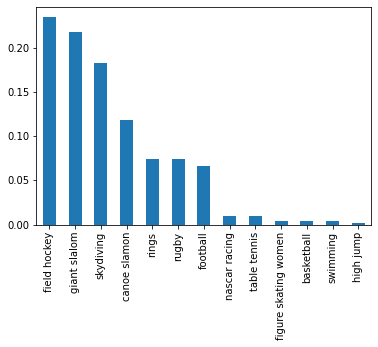

In [25]:
test_sports_preds.value_counts(normalize = True ).head(20).plot(kind='bar')
plt.xlabel
plt.show()

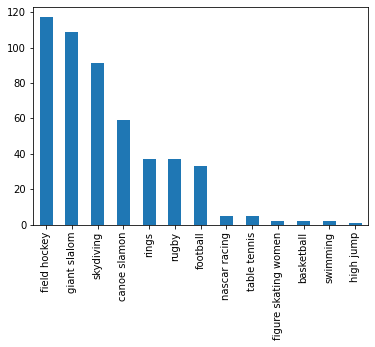

In [26]:
test_sports_preds.value_counts().head(20).plot(kind='bar')
plt.xlabel
plt.show()

In [41]:
test_sports_preds[0]

'field hockey'

In [44]:
test_data.class_indices.keys()

dict_keys(['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo', 'pommel horse', 'rings', 'rock climbing'

In [30]:
for x in test_sports_preds:
#  if test_data.class_indices.get_key
#test_data.class_indices

{'air hockey': 0,
 'ampute football': 1,
 'archery': 2,
 'arm wrestling': 3,
 'axe throwing': 4,
 'balance beam': 5,
 'barell racing': 6,
 'baseball': 7,
 'basketball': 8,
 'baton twirling': 9,
 'bike polo': 10,
 'billiards': 11,
 'bmx': 12,
 'bobsled': 13,
 'bowling': 14,
 'boxing': 15,
 'bull riding': 16,
 'bungee jumping': 17,
 'canoe slamon': 18,
 'cheerleading': 19,
 'chuckwagon racing': 20,
 'cricket': 21,
 'croquet': 22,
 'curling': 23,
 'disc golf': 24,
 'fencing': 25,
 'field hockey': 26,
 'figure skating men': 27,
 'figure skating pairs': 28,
 'figure skating women': 29,
 'fly fishing': 30,
 'football': 31,
 'formula 1 racing': 32,
 'frisbee': 33,
 'gaga': 34,
 'giant slalom': 35,
 'golf': 36,
 'hammer throw': 37,
 'hang gliding': 38,
 'harness racing': 39,
 'high jump': 40,
 'hockey': 41,
 'horse jumping': 42,
 'horse racing': 43,
 'horseshoe pitching': 44,
 'hurdles': 45,
 'hydroplane racing': 46,
 'ice climbing': 47,
 'ice yachting': 48,
 'jai alai': 49,
 'javelin': 50,
 '